# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities= []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

In [3]:
#Save url information 
url= "http://api.openweathermap.org/data/2.5/weather?"



### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#for each city in cities call API and gather information
# Perform a weather check on each city using a series of successive API calls.
city_name= []
city_lat= []
city_lon = []
city_maxtemp = []
city_humidity = []
city_cloudiness = []
city_windspeed = []
city_country= []
city_date= []

units="imperial"

Record = 1

print("Beginning Data Retrieval")
print("-------------------------")

for x in cities: 
    # Include a print log of each city as it's being processed (with the city number and city name).
    print(f"Processing Record {Record}: {x}")
    Record += 1

    #Build partial query URL to loop through cities
    query_url = f"{url}&q={x}&appid={weather_api_key}&units={units}"

    #"JSONify" the response to pull out variables
    city_weather= requests.get(query_url).json()

    #Set the system to only run once per second as to not crash
    time.sleep(1)

    #Append the lists to be able to create a df
    try:
        city_name.append(city_weather["name"])   
        city_lat.append(city_weather["coord"]["lat"])
        city_lon.append(city_weather["coord"]["lon"])
        city_maxtemp.append(city_weather["main"]["temp_max"])
        city_humidity.append(city_weather["main"]["humidity"])
        city_cloudiness.append(city_weather["clouds"]["all"])
        city_windspeed.append(city_weather["wind"]["speed"])
        city_country.append(city_weather["sys"]["country"])
        city_date.append(city_weather["dt"])

    #Need the forced guidance to make sure to skip if a city is not found by API
    except KeyError:
        print("City not found. Skipping ...")






Processing Record 42: alofi
Processing Record 43: mendi
Processing Record 44: provideniya
Processing Record 45: quatre cocos
Processing Record 46: kodiak
Processing Record 47: alamos
Processing Record 48: attawapiskat
City not found. Skipping ...
Processing Record 49: cherskiy
Processing Record 50: belaya gora
Processing Record 51: paita
Processing Record 52: san cristobal
Processing Record 53: kwekwe
Processing Record 54: kaitangata
Processing Record 55: port alfred
Processing Record 56: vaini
Processing Record 57: chokurdakh
Processing Record 58: fortuna
Processing Record 59: samusu
City not found. Skipping ...
Processing Record 60: hearst
Processing Record 61: cookeville
Processing Record 62: barrow
Processing Record 63: seydi
Processing Record 64: ukiah
Processing Record 65: gbarnga
Processing Record 66: padang
Processing Record 67: pozoblanco
Processing Record 68: bilma
Processing Record 69: soligalich
Processing Record 70: dawlatabad
Processing Record 71: sentyabrskiy
City not f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Creating data frame from city data lists pulled above 
city_data = pd.DataFrame(
    {'City Name': city_name,
     'Latitude': city_lat,
     'Longitude': city_lon, 
     'Max Temperature': city_maxtemp, 
     'Humidity': city_humidity, 
     'Cloudiness': city_cloudiness, 
     'Wind Speed': city_windspeed, 
     'Country': city_country, 
     'Date': city_date}) 

city_data.sample(10)

,City Name,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
34,Torbay,47.6666,-52.7314,28.00,86,90,9.22,CA,1610414272
101,Kavaratti,10.5669,72.6420,82.47,75,100,10.22,IN,1610414398
211,Bayan,46.0833,127.4000,-1.43,92,100,4.41,CN,1610414747
202,Fort Saint James,54.4333,-124.2500,29.30,94,59,4.54,CA,1610414735
357,Prince Rupert,54.3161,-130.3201,42.80,81,90,16.11,CA,1610414644
397,Portales,34.1862,-103.3344,28.40,100,1,6.91,US,1610414960
389,Deniliquin,-35.5333,144.9667,84.99,40,0,7.67,AU,1610414951
103,Marabu,4.4148,114.0089,77.00,94,40,1.14,MY,1610414611
431,Los Llanos de Aridane,28.6585,-17.9182,59.00,72,90,12.66,ES,1610415000
368,Yakeshi,49.2833,120.7333,-5.19,91,100,4.16,CN,1610414928


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
#Removing any cities with humidity over 100% 
Final_city_data = city_data[city_data["Humidity"] <= 100]

Final_city_data.head()

,City Name,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaqortoq,60.7167,-46.0333,41.00,36,75,26.46,GL,1610414487
1,Ponta do Sol,32.6667,-17.1000,55.00,66,9,3.00,PT,1610414126
2,Bluff,-46.6000,168.3333,63.25,57,13,2.10,NZ,1610414251
3,Carnarvon,-24.8667,113.6333,80.60,74,75,21.85,AU,1610414250
4,Albany,42.6001,-73.9662,28.99,67,18,2.71,US,1610414180


In [7]:
# Save dataframe to output location 
Final_city_data.to_csv(output_data_file, index= False, header= True)

# Read CSV 
Final_city_data= pd.read_csv(output_data_file)

In [8]:
Final_city_data.head()

,City Name,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaqortoq,60.7167,-46.0333,41.00,36,75,26.46,GL,1610414487
1,Ponta do Sol,32.6667,-17.1000,55.00,66,9,3.00,PT,1610414126
2,Bluff,-46.6000,168.3333,63.25,57,13,2.10,NZ,1610414251
3,Carnarvon,-24.8667,113.6333,80.60,74,75,21.85,AU,1610414250
4,Albany,42.6001,-73.9662,28.99,67,18,2.71,US,1610414180


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [9]:
def plotweather(x_values, y_values, xlabel, ylabel):
    title= f'{xlabel} vs. {ylabel}'
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    plt.savefig(f'../output_data/{title}.png')
      

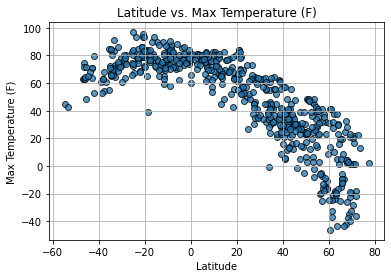

In [24]:
plotweather(Final_city_data["Latitude"], Final_city_data["Max Temperature"], "Latitude", "Max Temperature (F)" )



## Latitude vs. Humidity Plot

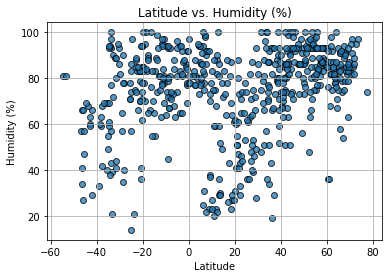

In [26]:
plotweather(Final_city_data["Latitude"], Final_city_data["Humidity"], "Latitude", "Humidity (%)" )

## Latitude vs. Cloudiness Plot

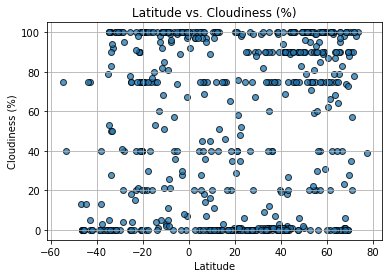

In [27]:
plotweather(Final_city_data["Latitude"], Final_city_data["Cloudiness"], "Latitude", "Cloudiness (%)" )

## Latitude vs. Wind Speed Plot

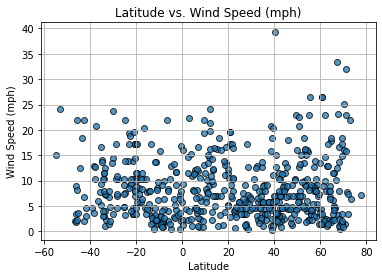

In [28]:
plotweather(Final_city_data["Latitude"], Final_city_data["Wind Speed"], "Latitude", "Wind Speed (mph)" )

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [14]:
#Get only Northern Hemisphere data
Northern_hemisphere = Final_city_data[Final_city_data["Latitude"] >= 0]


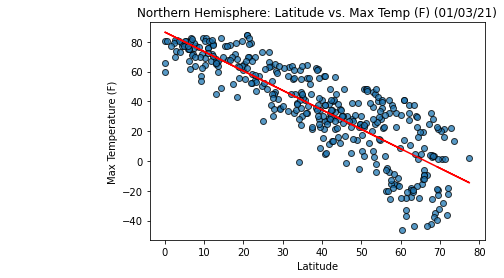

The r-value is:-0.8480608945840069


In [15]:
#Graphing only Northern Hemisphere Lat vs temp with linear regression 
x_values = Northern_hemisphere["Latitude"]
y_values = Northern_hemisphere["Max Temperature"]
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere: Latitude vs. Max Temp (F) (01/03/21)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-40,0), fontsize = 15, color= "red")
plt.show()

print("The r-value is:" + str(rvalue))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [16]:
#Get only Southern Hemisphere data
Southern_hemisphere = Final_city_data[Final_city_data["Latitude"] <= 0]

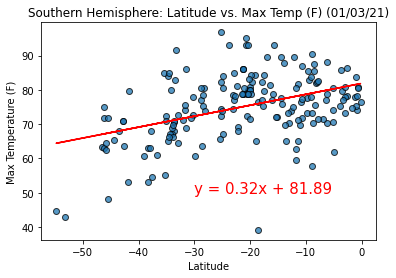

The r-value is:0.4250577341610024


In [17]:
#Graphing only Southern Hemisphere Lat vs temp with linear regression 
x_values = Southern_hemisphere["Latitude"]
y_values = Southern_hemisphere["Max Temperature"]
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere: Latitude vs. Max Temp (F) (01/03/21)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-30,50), fontsize = 15, color= "red")
plt.show()

print("The r-value is:" + str(rvalue))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

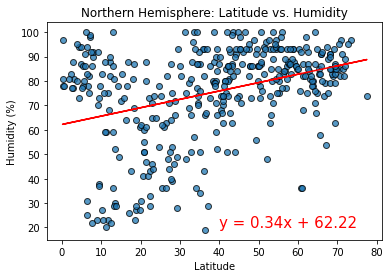

The r-value is:0.3622599529272241


In [18]:
x_values = Northern_hemisphere["Latitude"]
y_values = Northern_hemisphere["Humidity"]
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere: Latitude vs. Humidity")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (40,20), fontsize = 15, color= "red")
plt.show()

print("The r-value is:" + str(rvalue))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

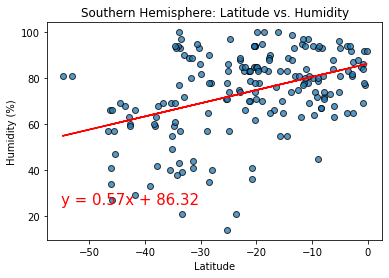

The r-value is:0.4099704338180285


In [19]:
x_values = Southern_hemisphere["Latitude"]
y_values = Southern_hemisphere["Humidity"]
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere: Latitude vs. Humidity")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,25), fontsize = 15, color= "red")
plt.show()

print("The r-value is:" + str(rvalue))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

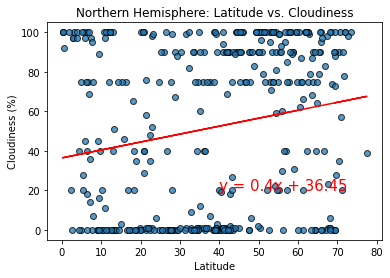

The r-value is:0.19646103029566528


In [20]:
x_values = Northern_hemisphere["Latitude"]
y_values = Northern_hemisphere["Cloudiness"]
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere: Latitude vs. Cloudiness")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (40,20), fontsize = 15, color= "red")
plt.show()

print("The r-value is:" + str(rvalue))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

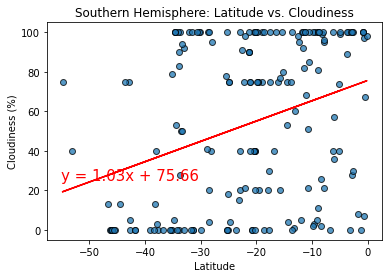

The r-value is:0.3227017480937454


In [21]:
x_values = Southern_hemisphere["Latitude"]
y_values = Southern_hemisphere["Cloudiness"]
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere: Latitude vs. Cloudiness")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,25), fontsize = 15, color= "red")
plt.show()

print("The r-value is:" + str(rvalue))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

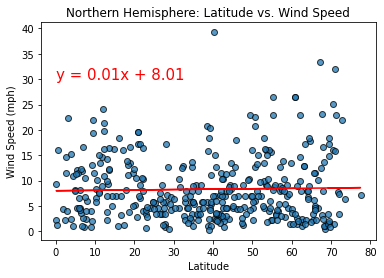

The r-value is:0.02575116603510169


In [22]:
x_values = Northern_hemisphere["Latitude"]
y_values = Northern_hemisphere["Wind Speed"]
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere: Latitude vs. Wind Speed")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (0,30), fontsize = 15, color= "red")
plt.show()

print("The r-value is:" + str(rvalue))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

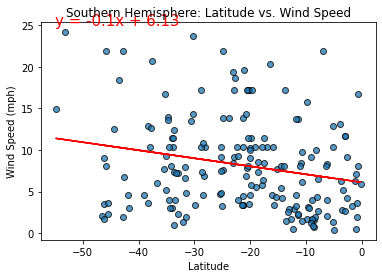

The r-value is:-0.22367424573363437


In [23]:
x_values = Southern_hemisphere["Latitude"]
y_values = Southern_hemisphere["Wind Speed"]
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere: Latitude vs. Wind Speed")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,25), fontsize = 15, color= "red")
plt.show()

print("The r-value is:" + str(rvalue))